<a href="https://colab.research.google.com/github/MohitTiwari-07/kmean/blob/main/Mohit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import seaborn as sns
import pandas as pd

# Load Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')

# Display first 5 rows
print(titanic.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


 Data Summary:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

 Statistical Summary (Numerical):

         survived     

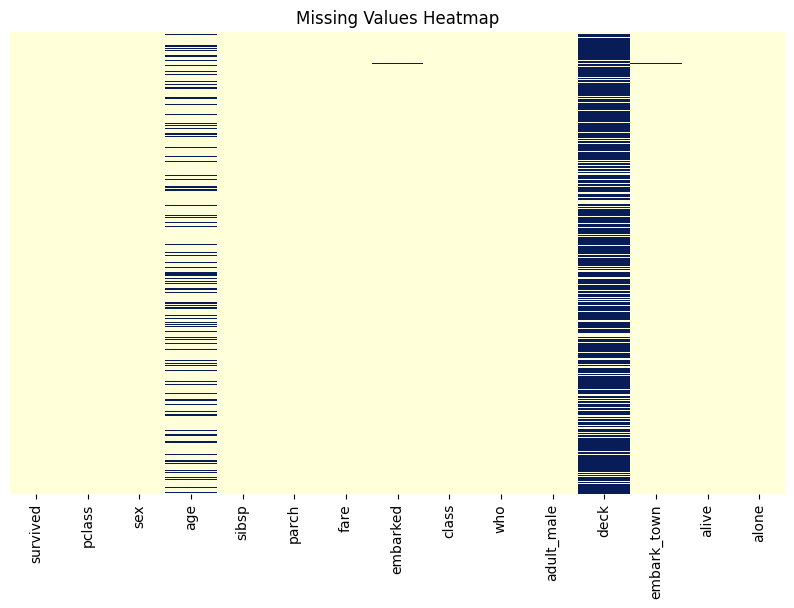

In [3]:
import matplotlib.pyplot as plt

# 1. Summary of dataset
print(" Data Summary:\n")
print(titanic.info())
print("\n Statistical Summary (Numerical):\n")
print(titanic.describe())

# 2. Missing values count
print("\n Missing Values Per Column:\n")
print(titanic.isnull().sum())

# 3. Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.isnull(), cbar=False, cmap='YlGnBu', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()


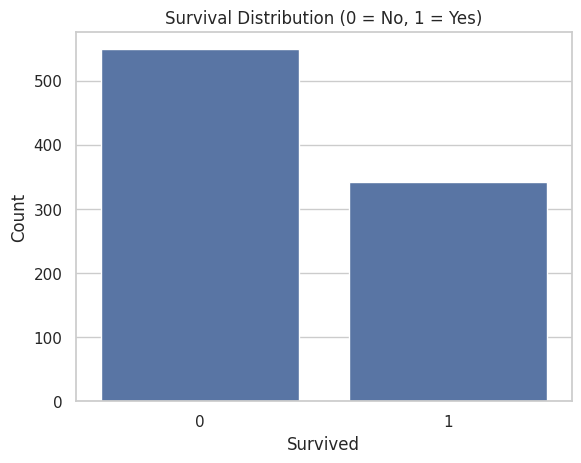

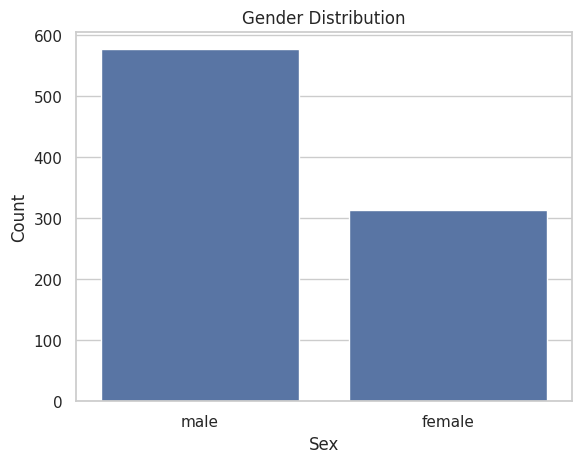

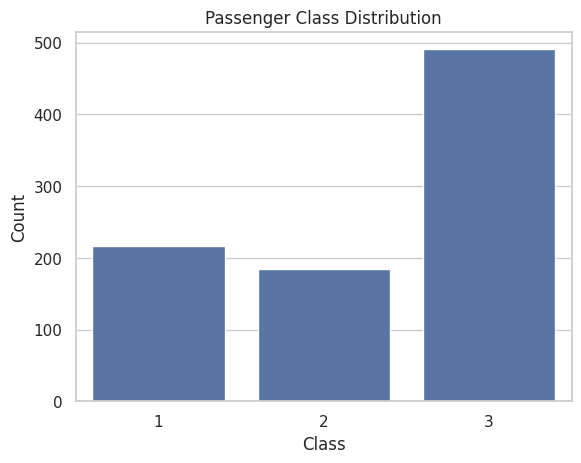

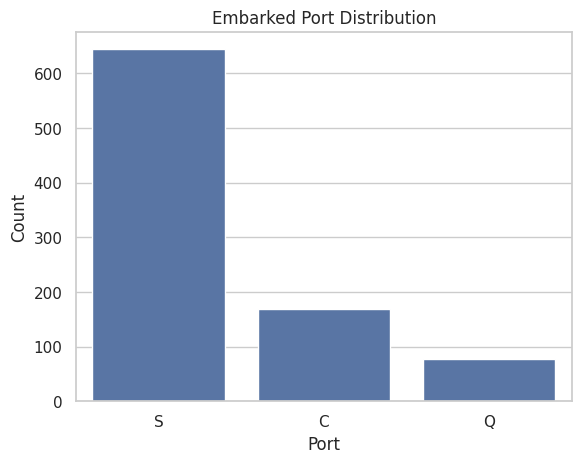

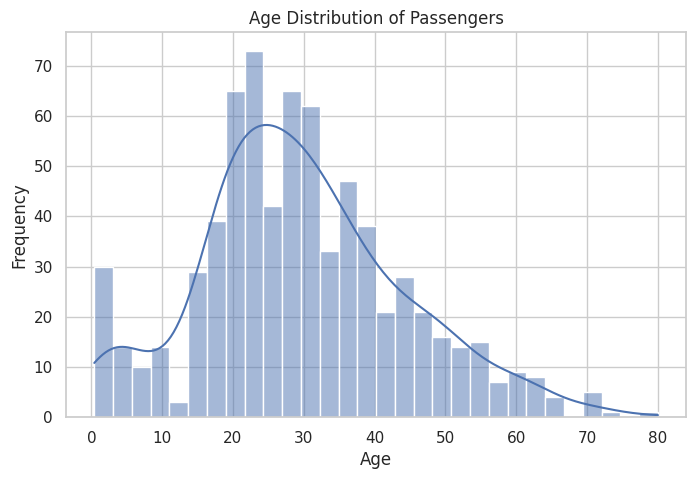

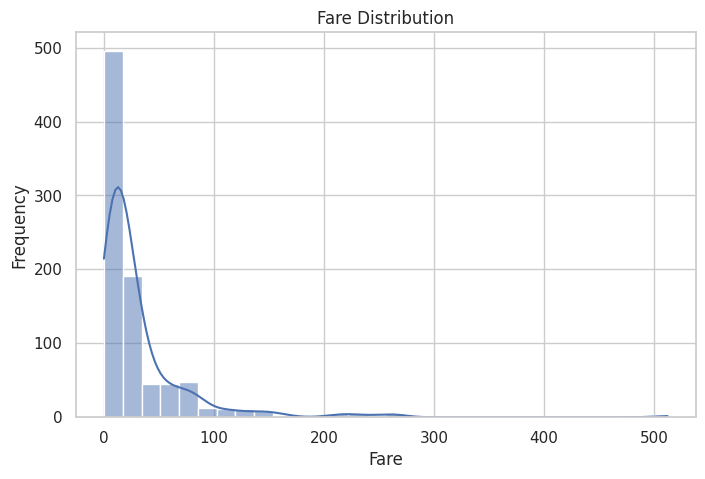

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# 1. Survival count
sns.countplot(x='survived', data=titanic)
plt.title('Survival Distribution (0 = No, 1 = Yes)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# 2. Gender count
sns.countplot(x='sex', data=titanic)
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# 3. Passenger class
sns.countplot(x='pclass', data=titanic)
plt.title('Passenger Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# 4. Embarkation port
sns.countplot(x='embarked', data=titanic)
plt.title('Embarked Port Distribution')
plt.xlabel('Port')
plt.ylabel('Count')
plt.show()

# 5. Age distribution (with KDE)
plt.figure(figsize=(8, 5))
sns.histplot(titanic['age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 6. Fare distribution
plt.figure(figsize=(8, 5))
sns.histplot(titanic['fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


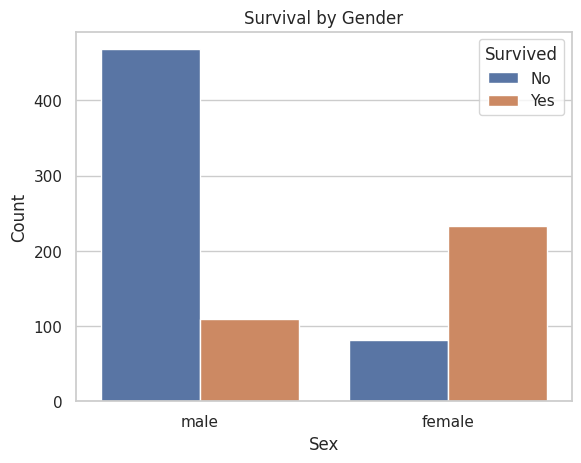

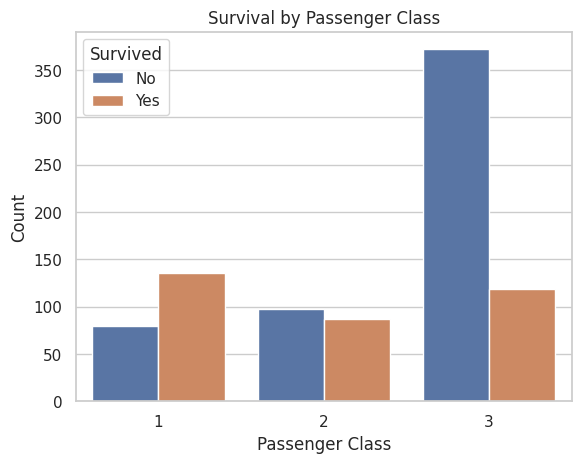

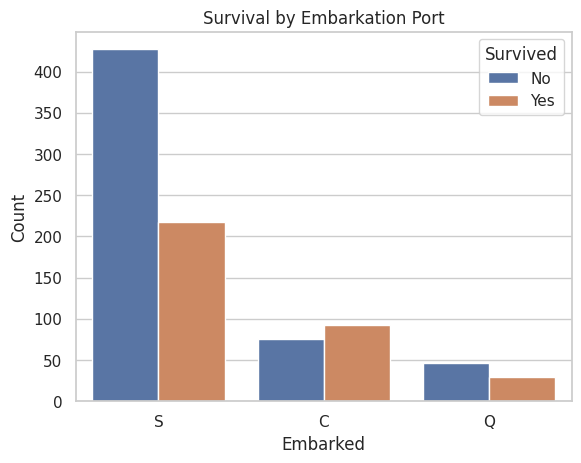

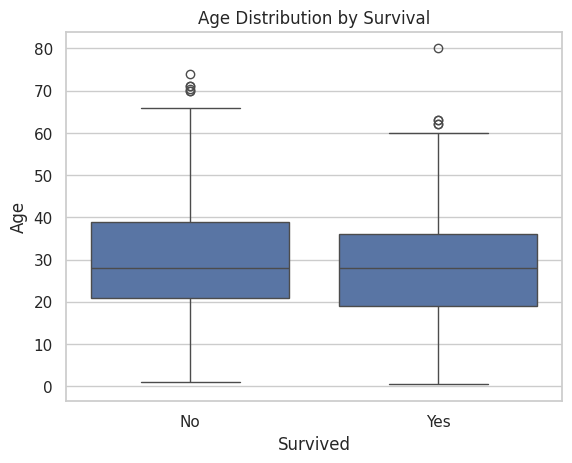

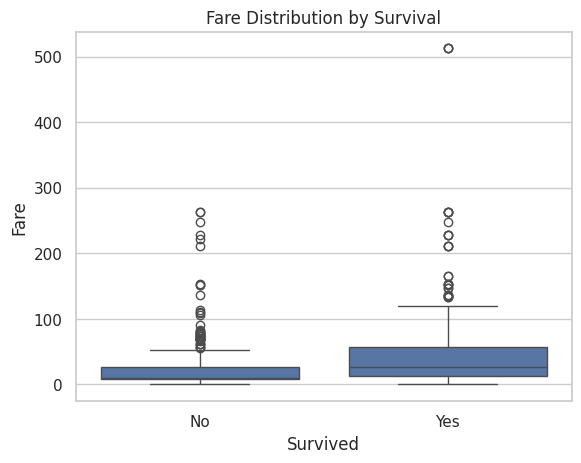

In [ ]:
# 1. Survival by Gender
sns.countplot(x='sex', hue='survived', data=titanic)
plt.title('Survival by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# 2. Survival by Passenger Class
sns.countplot(x='pclass', hue='survived', data=titanic)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# 3. Survival by Embarked Port
sns.countplot(x='embarked', hue='survived', data=titanic)
plt.title('Survival by Embarkation Port')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# 4. Age vs Survival (Boxplot)
sns.boxplot(x='survived', y='age', data=titanic)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# 5. Fare vs Survival (Boxplot)
sns.boxplot(x='survived', y='fare', data=titanic)
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


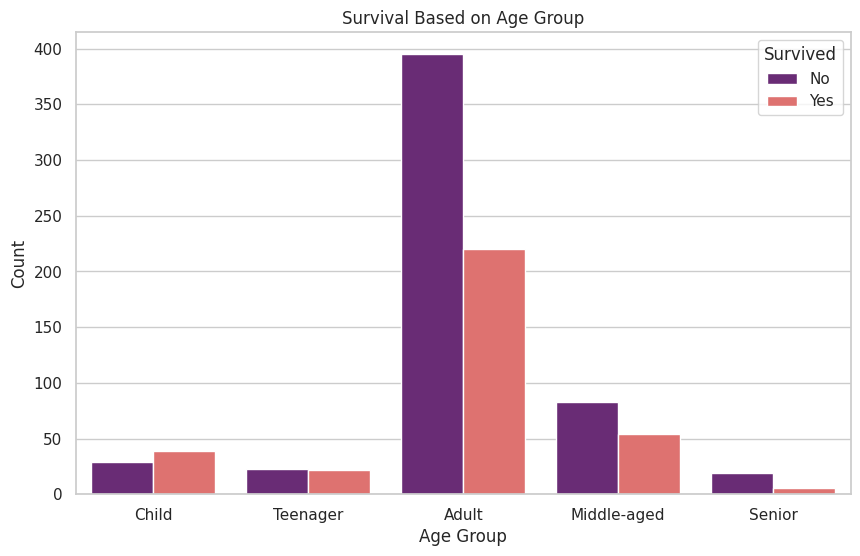

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make a copy to avoid modifying the original
titanic_data = titanic.copy()

# Fill missing age values for binning
titanic_data['age'] = titanic_data['age'].fillna(titanic_data['age'].median())

# Define age bins and labels
bins = [0, 12, 18, 40, 60, 80]
labels = ['Child', 'Teenager', 'Adult', 'Middle-aged', 'Senior']

# Create new column for age groups
titanic_data['age_group'] = pd.cut(titanic_data['age'], bins=bins, labels=labels, right=False)

# ✅ Visualize Survival by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='survived', data=titanic_data, palette='magma')
plt.title('Survival Based on Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


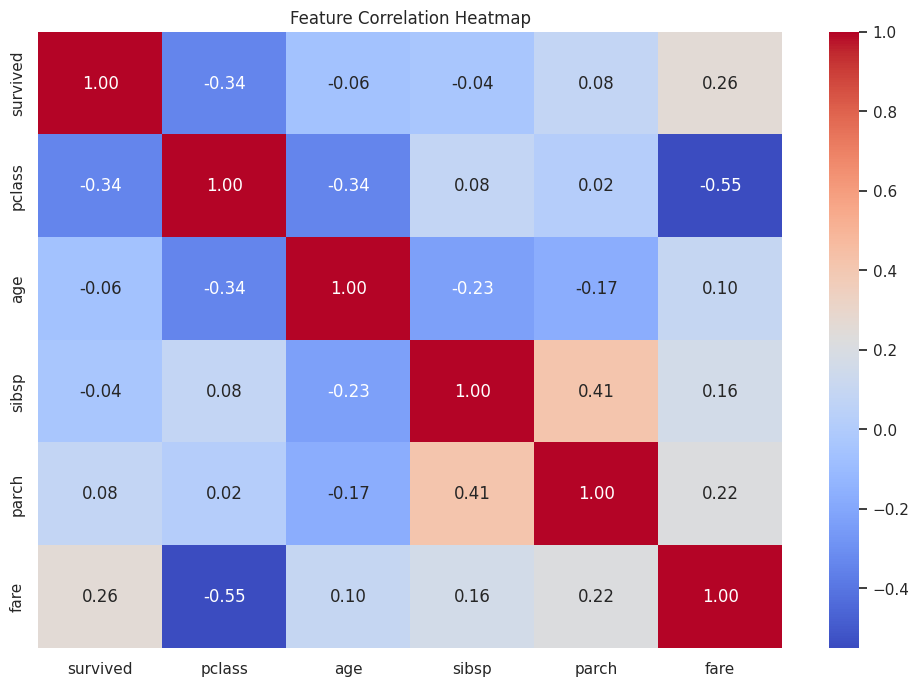

In [ ]:


plt.figure(figsize=(12, 8))

# Select only numeric features for correlation calculation

numeric_features = titanic_data.select_dtypes(include=np.number)

sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Feature Correlation Heatmap')

plt.show()

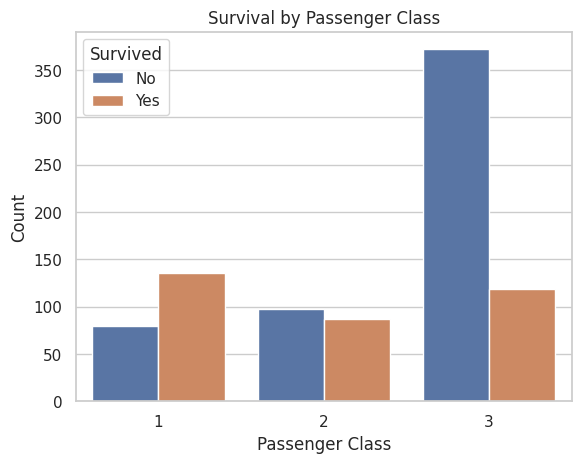

In [ ]:
sns.countplot(x='pclass', hue='survived', data=titanic)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

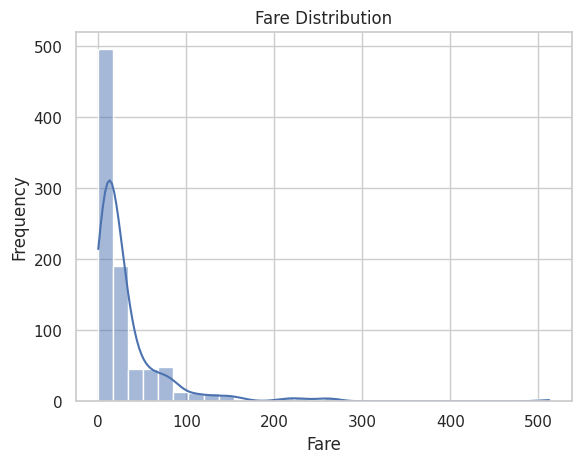

In [ ]:
sns.histplot(titanic['fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

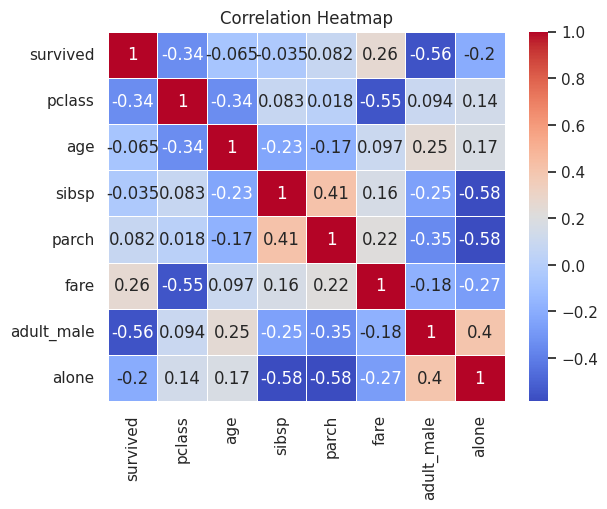

In [ ]:
corr = titanic.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()